# Starbucks Capstone 

### Introduction

This data set contains simulated data that startbucks customer where we can see the behavior of customers buying patterns, and using of that we can easily manipulatig the data to give the good loyal customer for order offers, and this data is captured from starbucks user data.  

Not all users get a similar offer, and that is the test to unravel with this informational index.

Your errand is to join exchange, segment and offer information to figure out which segment bunches react best to which offer sort. This informational index is a disentangled variant of the genuine Starbucks application on the grounds that the fundamental test system just has one item though Starbucks really sells many items.

Each offer has a legitimacy period before the offer lapses. For instance, a BOGO offer may be substantial for just 5 days. You'll find in the informational collection that enlightening offers have a legitimacy period despite the fact that these promotions are just giving data about an item; for instance, if an instructive offer has 7 days of legitimacy, you can accept the client is feeling the impact of the idea for 7 days in the wake of getting the ad.


### Cleaning

This makes data cleaning especially important and tricky.

You'll likewise need to consider that some segment gatherings will make buys regardless of whether they don't get an offer. From a business point of view, if a client is going to make a 10 dollar buy without an offer at any rate, you wouldn't have any desire to send a purchase 10 dollars get 2 dollars off offer. You'll need to attempt to survey what a specific segment gathering will purchase when not accepting any offers.


<h1><b>Metrics</b></h1>
The metric I used this project is accuracy. Since we have a simple classification problem, I will use accuracy to evaluate my models. We want to see how well our model by seeing the number of correct predictions vs total number of predictions. For the different models I used in this project, I checked the accuracy my training and testing data sets and decided which to choose based on it.

# Data Sets

The data is contained in three files:

* portfolio.json - containing offer ids and meta data about each offer.
* profile.json - demographic data of each customer.
* transcript.json - records for transactions, offers received, offers viewed, and offers completed of each customer.


**portfolio.json**
* id (string) - offer id
* offer_type (string) - type of offer that is BOGO, discount, informational
* difficulty (int) - minimum required spend to complete an offer to each
* reward (int) - reward given for completing an offer  
* duration (int) - time for offer to be open, per day
* channels (list of strings)

**profile.json**
* age (int) - age of customer 
* became_member_on (int) - date when customer created app account
* gender (str) - gender of the customer (note some entries contain 'O' for other rather than M or F)
* id (str) - customer id
* income (float) - customer's income

**transcript.json**
* event (str) - record description.
* person (str) - customer id.
* time (int) - time in hours since start of test. The data begins at time t=0 of customer
* value - (dict of strings) - either an offer id or transaction amount depending on the record of customer


In [2]:
import pandas as pd
import numpy as np
import math
import json
import matplotlib.pyplot as plt
%matplotlib inline
from helper import *

# read in the json files
portfolio = pd.read_json('data/portfolio.json', orient='records', lines=True)
profile = pd.read_json('data/profile.json', orient='records', lines=True)
transcript = pd.read_json('data/transcript.json', orient='records', lines=True)

# 1.Data Cleaning process

<b>first task -Portfolio Dataframe Tasks:<br></b>

<li>Split the channels data into some columns.</li>
<li>Split offer_type into some columns.</li>
<li>change id column tarnsfering into offer_id.</li>

Clean the portfolio dataset.

In [6]:
portfolio_data_clean = clean_portfolio(portfolio)

In [9]:
portfolio_data_clean.head()

,difficulty,duration,offer_id,offer_type,reward,channel_email,channel_mobile,channel_social,channel_web
0,10,7,ae264e3637204a6fb9bb56bc8210ddfd,bogo,10,1,1,1,0
1,10,5,4d5c57ea9a6940dd891ad53e9dbe8da0,bogo,10,1,1,1,1
2,0,4,3f207df678b143eea3cee63160fa8bed,informational,0,1,1,0,1
3,5,7,9b98b8c7a33c4b65b9aebfe6a799e6d9,bogo,5,1,1,0,1
4,20,10,0b1e1539f2cc45b7b9fa7c272da2e1d7,discount,5,1,0,0,1


<h><b>portfolio.json</b></h><br>

id (string) - offer id<br>
offer_type (string) - type of offer ie BOGO, discount, informational<br>
difficulty (int) - minimum required spend to complete an offer<br>
reward (int) - reward given for completing an offer<br>
duration (int) - time for offer to be open, in days<br>
channels (list of strings)

Clean the profile dataset.

In [10]:
profile_data_clean = clean_profile(profile)

In [12]:
profile_data_clean.head()

,age,became_member_on,gender,customer_id,income,valid,gender_F,gender_M,gender_O
0,118,2017-02-12,None,68be06ca386d4c31939f3a4f0e3dd783,NaN,0,0,0,0
1,55,2017-07-15,F,0610b486422d4921ae7d2bf64640c50b,112000.0,1,1,0,0
2,118,2018-07-12,None,38fe809add3b4fcf9315a9694bb96ff5,NaN,0,0,0,0
3,75,2017-05-09,F,78afa995795e4d85b5d9ceeca43f5fef,100000.0,1,1,0,0
4,118,2017-08-04,None,a03223e636434f42ac4c3df47e8bac43,NaN,0,0,0,0


<h><b>profile.json</b></h><br>

age (int) - age of the customer<br>
became_member_on (int) - date when customer created an app account<br>
gender (str) - gender of the customer (note some entries contain 'O' for other rather than M or F)<br>
id (str) - customer id<br>
income (float) - customer's income

<b>Profile Dataframe Tasks:<br></b>

<li>Spliting value in several columns for offers & transactions</li>
<li>Spliting event column into sevelar columns</li>
<li>transfer column name person to customer_id</li>

Clean the transcript dataset.

In [4]:
transcript_data_clean = clean_transcript(transcript)

In [5]:
transcript_data_clean.head()

,customer_id,time,event_offer_completed,event_offer_received,event_offer_viewed,event_transaction,offer_id,amount
0,78afa995795e4d85b5d9ceeca43f5fef,0,0,1,0,0,9b98b8c7a33c4b65b9aebfe6a799e6d9,NaN
1,a03223e636434f42ac4c3df47e8bac43,0,0,1,0,0,0b1e1539f2cc45b7b9fa7c272da2e1d7,NaN
2,e2127556f4f64592b11af22de27a7932,0,0,1,0,0,2906b810c7d4411798c6938adc9daaa5,NaN
3,8ec6ce2a7e7949b1bf142def7d0e0586,0,0,1,0,0,fafdcd668e3743c1bb461111dcafc2a4,NaN
4,68617ca6246f4fbc85e91a2a49552598,0,0,1,0,0,4d5c57ea9a6940dd891ad53e9dbe8da0,NaN


<h><b>transcript.json</b></h>

event (str) - record description (ie transaction, offer received, offer viewed, etc.)<br>
person (str) - customer id<br>
time (int) - time in hours since start of test. The data begins at time t=0<br>
value - (dict of strings) - either an offer id or transaction amount depending on the record

Let's merge all the dataframes into one for analysis

In [13]:
df = merge_datasets(portfolio_data_clean, profile_data_clean, transcript_data_clean)

In [14]:
df.head()

,customer_id,time,event_offer_completed,event_offer_received,event_offer_viewed,event_transaction,offer_id,amount,age,became_member_on,...,gender_M,gender_O,difficulty,duration,offer_type,reward,channel_email,channel_mobile,channel_social,channel_web
0,78afa995795e4d85b5d9ceeca43f5fef,0,0,1,0,0,B3,NaN,75,2017-05-09,...,0,0,5.0,7.0,bogo,5.0,1.0,1.0,0.0,1.0
1,a03223e636434f42ac4c3df47e8bac43,0,0,1,0,0,D1,NaN,118,2017-08-04,...,0,0,20.0,10.0,discount,5.0,1.0,0.0,0.0,1.0
2,e2127556f4f64592b11af22de27a7932,0,0,1,0,0,D4,NaN,68,2018-04-26,...,1,0,10.0,7.0,discount,2.0,1.0,1.0,0.0,1.0
3,8ec6ce2a7e7949b1bf142def7d0e0586,0,0,1,0,0,D3,NaN,118,2017-09-25,...,0,0,10.0,10.0,discount,2.0,1.0,1.0,1.0,1.0
4,68617ca6246f4fbc85e91a2a49552598,0,0,1,0,0,B2,NaN,118,2017-10-02,...,0,0,10.0,5.0,bogo,10.0,1.0,1.0,1.0,1.0


## Analysis

### Task1: Population Analysis 
Let's check the total amount that the experiment ran

In [15]:
df.time.max() / 24

29.75

In [16]:
df.shape

(306534, 24)

Therer are experiment was run for almost 30 days, and a grand total of 306,534 events we have collected.

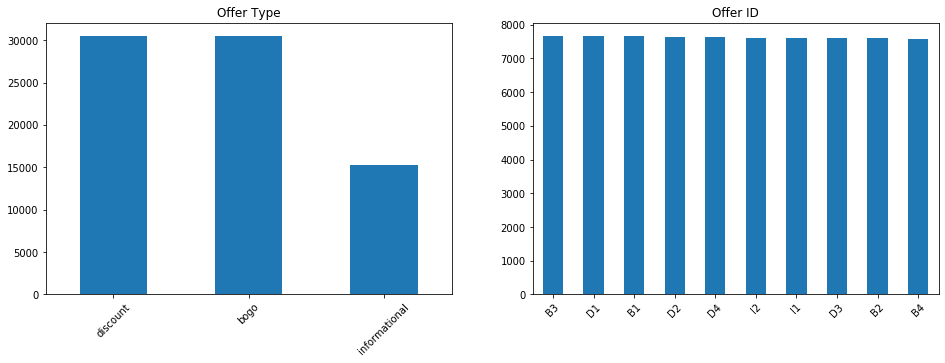

In [17]:
plt.subplot(121)
df[df.event_offer_received == 1].offer_type.value_counts().plot(kind='bar', rot=45, figsize=(16,5))
plt.title('Offer Type');

plt.subplot(122)
df[df.event_offer_received == 1].offer_id.value_counts().plot(kind='bar', rot=45)
plt.title('Offer ID');

In [18]:
df[df.event_offer_received == 1].offer_id.value_counts()

B3    7677
D1    7668
B1    7658
D2    7646
D4    7632
I2    7618
I1    7617
D3    7597
B2    7593
B4    7571
Name: offer_id, dtype: int64

Each offer was received almost the same number of the times. 

### Customers Dataframe
This dataframe is intended to aggregate offer and transactional data on a per customer basis. This should facilitate the analysis of each customer's transactional behavior

In [19]:
customers_ana = per_customer_data(df, profile_data_clean)

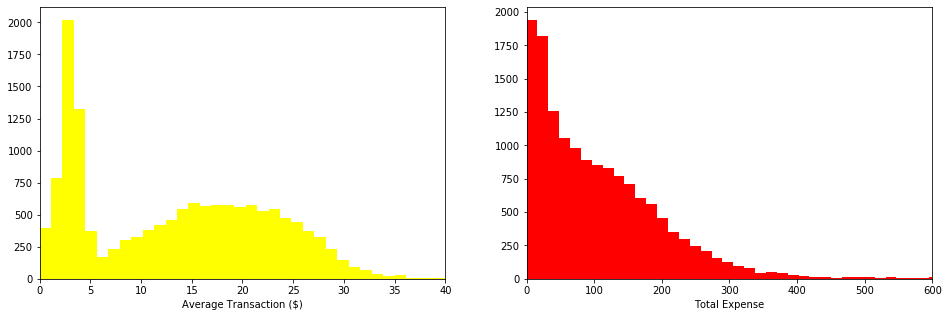

In [20]:
plt.figure(figsize=(16,5))

bins = 400

#ploting histogram of average transaction and total expense
avg_transaction = customers_ana[customers_ana.valid == 1].total_expense / customers_ana[customers_ana.valid == 1].total_transactions
avg_transaction.fillna(0, inplace=True)
plt.subplot(121)
plt.hist(avg_transaction, bins,color = "yellow")
plt.xlabel('Average Transaction ($)')
ax = plt.gca();
ax.set_xlim(0,40);

#ploting histogram of
bins = 100
plt.subplot(122)
plt.hist(customers_ana[customers_ana.valid == 1].total_expense, bins, color = "red");
plt.xlabel('Total Expense')
ax = plt.gca();
ax.set_xlim(0,600);

let's plot the number of customer with gender, age, income.

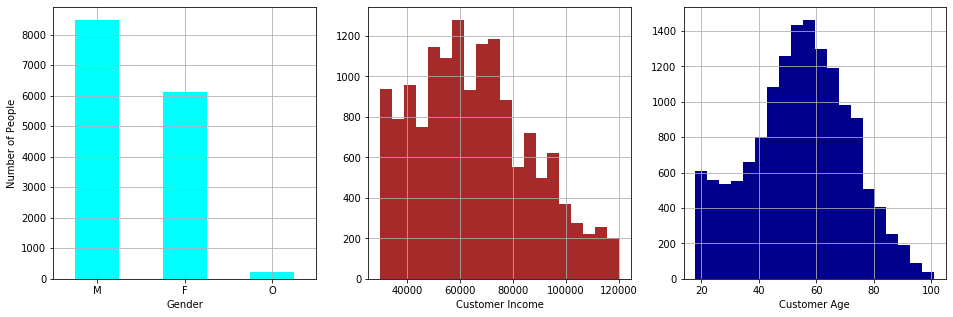

In [21]:
plt.figure(figsize=(16,5))

plt.subplot(131)
customers_ana.gender.value_counts().reindex(['M', 'F', 'O']).plot(kind='bar', rot=0, figsize=(16,5), color='aqua');
plt.ylabel('Number of People');
plt.xlabel('Gender');
plt.grid();

plt.subplot(132)
cust_income = customers_ana[customers_ana.income_group > 0].income#_group.value_counts().reindex(range(30000, 111000,10000))
plt.xlabel('Customer Income');
plt.hist(cust_income, 20, color='brown')
plt.grid()

plt.subplot(133)
cust_age = customers_ana[customers_ana.valid == 1].age
plt.xlabel('Customer Age');
plt.hist(cust_age, 20, color='darkblue')
plt.grid(True)


Population distributions by gender, income and age. The sample provides significantly more males. Both the income and the age distribution seem to approach a normal distribution in plot as you see

Text(0, 0.5, '$')

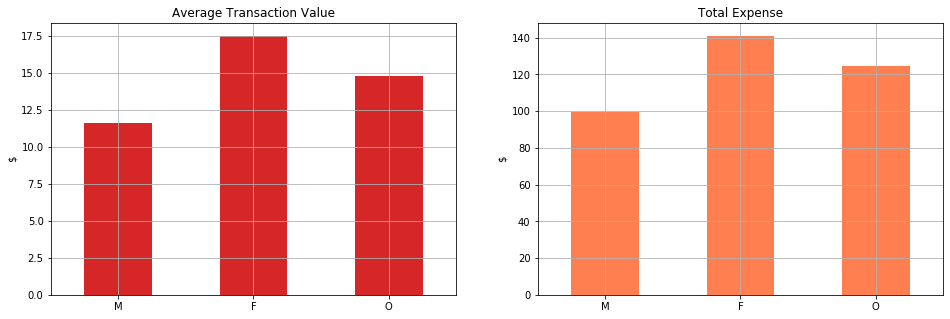

In [22]:
plt.figure(figsize=(16,5))

plt.subplot(121)
gender_groupby = customers_ana[customers_ana.valid == 1].groupby('gender')
gender_transacts = gender_groupby.total_transactions.sum()
gender_expense = gender_groupby.total_expense.sum()
(gender_expense / gender_transacts).reindex(['M', 'F', 'O']).plot(kind='bar', rot=0, color='tab:red');
plt.title('Average Transaction Value');
plt.xlabel('');
plt.grid();
plt.ylabel('$')

plt.subplot(122)
gender_groupby.total_expense.mean().reindex(['M', 'F', 'O']).plot(kind='bar', rot=0, color='coral');
plt.title('Total Expense');
plt.xlabel('');
plt.grid();
plt.ylabel('$')

By the gender and women make more expensive tranasactions and spend more money in general.

Expenses and average transaction value grow as the income grows, which is expected.

Text(0, 0.5, '$')

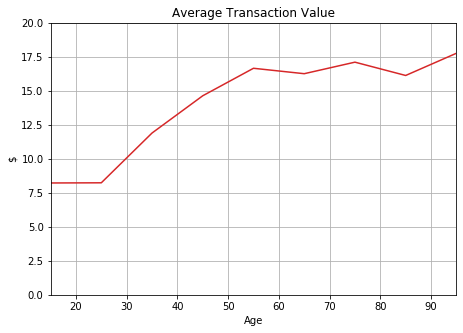

In [23]:
plt.figure(figsize=(16,5))


plt.subplot(121)
age_groupby = customers_ana[(customers_ana.valid == 1) & (customers_ana.income_group > 0)].groupby('age_group')
age_transacts = age_groupby.total_transactions.sum()
age_expense = age_groupby.total_expense.sum()
ax = (age_expense / age_transacts).reindex(range(15, 96,10)).plot(kind='line', rot=0, color='tab:red');
plt.title('Average Transaction Value');
ax.set_ylim(0, 20)
plt.grid(True)
plt.xlabel('Age')
plt.ylabel('$')



Expenses and average transaction value grow as the income grows, which is expected.

## Task2: Offer Analysis

### Analysis per offer kind of customer

ploting offer expenses of customer

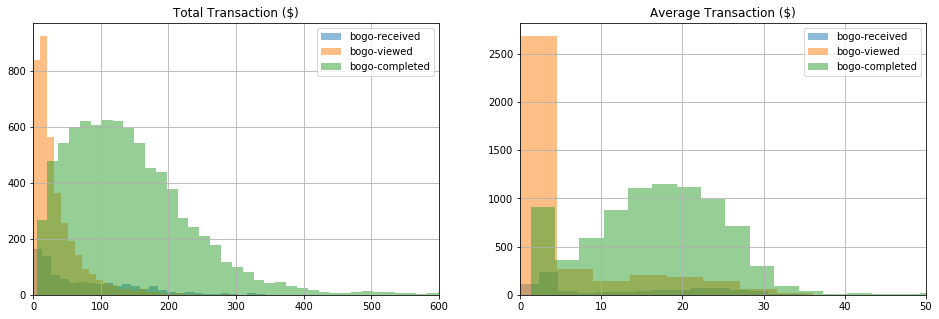

In [45]:
plot_offer_expense(customers_ana, 'bogo')

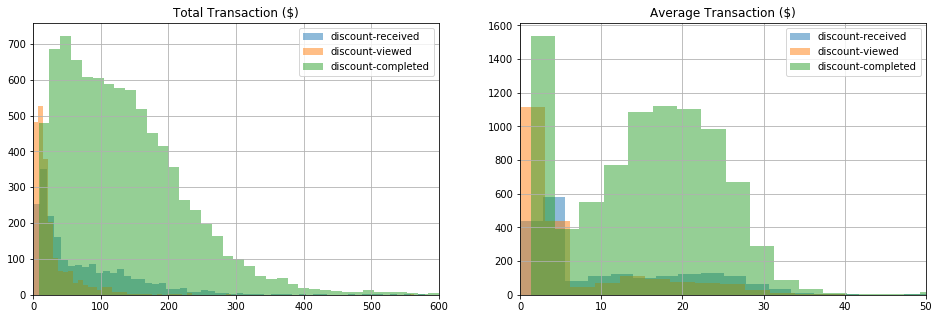

In [46]:
plot_offer_expense(customers_ana, 'discount')

offer expenses with customer informational

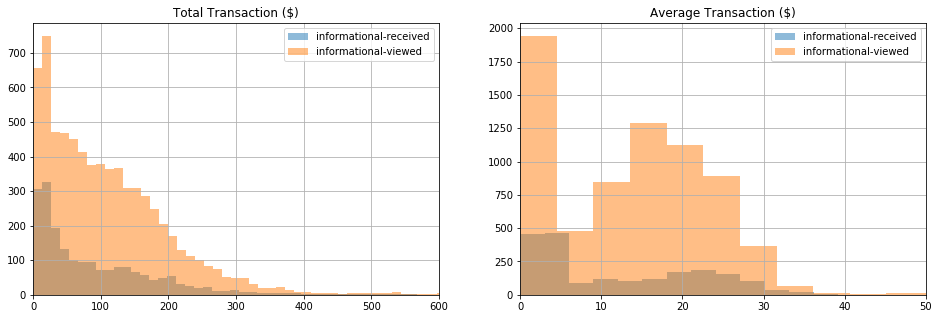

In [47]:
plot_offer_expense(customers_ana, 'informational')

here we ploting the net expenses of customer BOGO offer

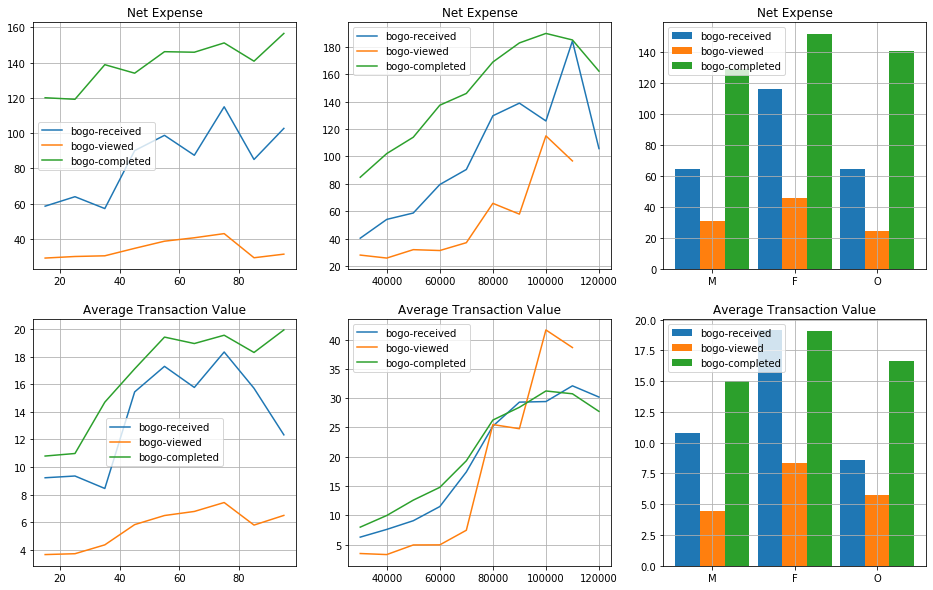

In [48]:
plot_offer_expense_by(customers_ana, 'bogo')

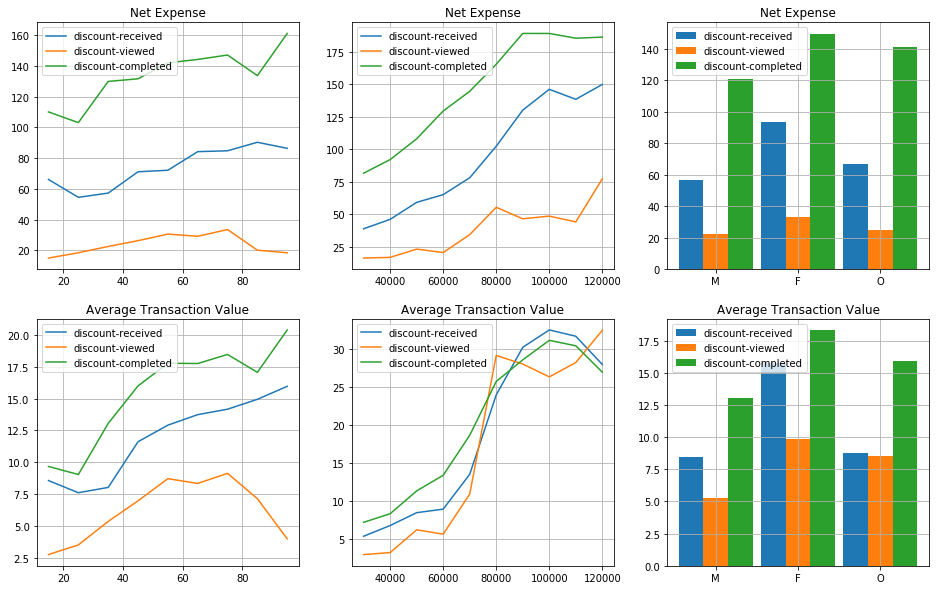

In [21]:
plot_offer_expense_by(customers, 'discount')

In [35]:
customers_ana.corr().style.background_gradient(cmap='coolwarm')

C:\Users\vishal\AppData\Local\Continuum\anaconda3\envs\data_S\lib\site-packages\matplotlib\colors.py:479: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1



Correlation shows that the offer completions have some impact on the spending habits of customers. Also, income and gender seem to have some impact as well

# Task3: Offer Recommendation

#### Simple recommendation system

Knowledge based recommendations for the customer without demographics data.<br>

Get the most popular offers to the customer without demographics data.<br>

make varibale of offers

In [24]:
offers = get_most_popular_offers(customers_ana, n_top=10)
print(offers[0])
print(offers[1])

['B2', 'B1', 'D1', 'D4', 'B3', 'B4', 'D3', 'D2', 'I1', 'I2']
{'B2': 144.72500000000002, 'B1': 144.505, 'D1': 144.40000000000003, 'D4': 133.92000000000002, 'B3': 127.47999999999999, 'B4': 126.145, 'D3': 125.105, 'D2': 117.8, 'I1': 109.76999999999998, 'I2': 88.41}


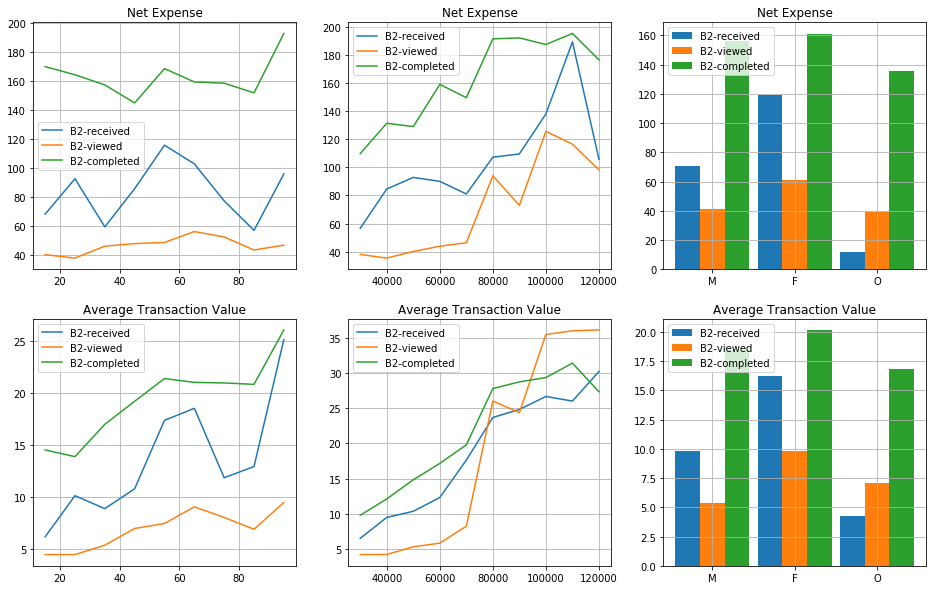

In [25]:
plot_offer_expense_by(customers_ana, 'B2')

### Task4:: Making Recommendation system with filters

Knowledge based recommendations for the Customers using demographics data as filters.<br>


In [34]:
offers = get_most_popular_offers_filtered(customers_ana, n_top=10, income=95000)
print(offers[0])
print(offers[1])

['B3', 'D3', 'D1', 'D4', 'B1', 'D2', 'B4', 'B2', 'I1', 'I2']
{'B3': 204.325, 'D3': 204.22000000000003, 'D1': 204.21, 'D4': 197.41000000000003, 'B1': 196.62, 'D2': 195.17, 'B4': 187.98, 'B2': 186.17000000000002, 'I1': 185.275, 'I2': 180.41500000000002}


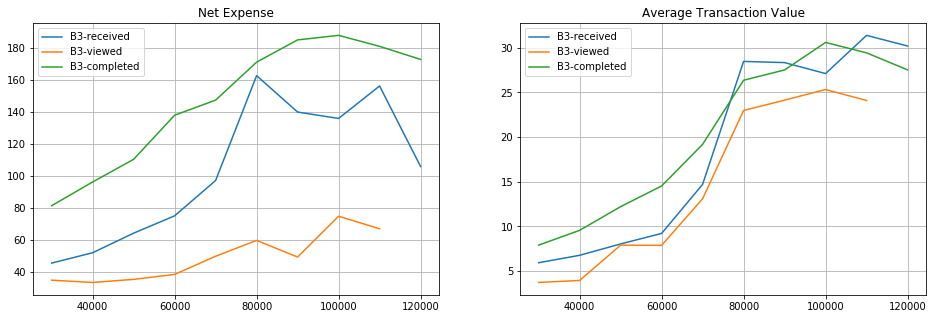

In [27]:
offer = 'B3'
rcv_by, vwd_by, cpd_by = get_offer_stat_by(customers_ana, 'net_expense', offer, 'income_group', aggr='mean')
rcv_avg_by, vwd_avg_by, cpd_avg_by = get_average_expense_by(customers_ana, offer, 'income_group')

plt.figure(figsize=(16,5))

plt.subplot(121)
plt.plot(rcv_by, label='{}-received'.format(offer))
plt.plot(vwd_by, label='{}-viewed'.format(offer))
plt.plot(cpd_by,  label='{}-completed'.format(offer))
plt.legend(loc='best')
plt.title('Net Expense');
plt.grid();

plt.subplot(122)
plt.plot(rcv_avg_by, label='{}-received'.format(offer))
plt.plot(vwd_avg_by, label='{}-viewed'.format(offer))
plt.plot(cpd_avg_by, label='{}-completed'.format(offer))
plt.legend(loc='best')
plt.title('Average Transaction Value');
plt.grid();

So Here we can see that for this demographic, the completed offers customers data for the recommended offer (B3) provides both the maximum net expense and average transaction value<br>

<b>Now, What about for gender?

In [28]:
offers = get_most_popular_offers_filtered(customers_ana, n_top=10, gender='M')
print(offers[0])
print(offers[1])

['B2', 'D1', 'B1', 'D4', 'B3', 'B4', 'D3', 'I1', 'D2', 'I2']
{'B2': 138.835, 'D1': 136.89000000000001, 'B1': 136.45, 'D4': 126.485, 'B3': 119.77000000000001, 'B4': 115.60999999999999, 'D3': 110.4, 'I1': 109.575, 'D2': 101.88, 'I2': 71.00500000000001}


In [29]:
offers = get_most_popular_offers_filtered(customers_ana, n_top=10, gender='F')
print(offers[0])
print(offers[1])

['D1', 'D4', 'B1', 'D3', 'B2', 'B4', 'D2', 'I1', 'B3', 'I2']
{'D1': 154.83, 'D4': 154.62, 'B1': 153.745, 'D3': 153.59000000000003, 'B2': 150.37, 'B4': 145.21999999999997, 'D2': 145.03000000000003, 'I1': 142.23, 'B3': 141.60999999999999, 'I2': 132.5}


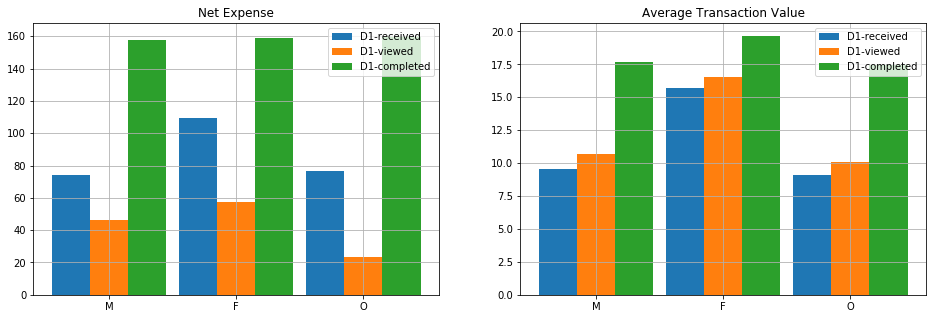

In [30]:
rcv_gender, vwd_gender, cpd_gender = get_offer_stat_by(customers_ana, 'net_expense', 'D1', 'gender', aggr='mean')
rcv_avg_gender, vwd_avg_gender, cpd_avg_gender = get_average_expense_by(customers_ana, 'D1', 'gender')

plt.figure(figsize=(16,5))

plt.subplot(121)
index = np.array([0,1,2])
bar_width = 0.3

plt.bar(index, rcv_gender.reindex(['M', 'F', 'O']), bar_width, label='D1-received')
plt.bar(index + bar_width, vwd_gender.reindex(['M', 'F', 'O']), bar_width, label='D1-viewed')
plt.bar(index + 2*bar_width, cpd_gender.reindex(['M', 'F', 'O']), bar_width, label='D1-completed')
plt.grid();
plt.legend(loc='best');
plt.title('Net Expense');
plt.xticks(index + bar_width, ('M', 'F', 'O'));

plt.subplot(122)

index = np.array([0,1,2])
bar_width = 0.3
plt.bar(index, rcv_avg_gender.reindex(['M', 'F', 'O']), bar_width, label='D1-received')
plt.bar(index + bar_width, vwd_avg_gender.reindex(['M', 'F', 'O']), bar_width, label='D1-viewed')
plt.bar(index + 2*bar_width, cpd_avg_gender.reindex(['M', 'F', 'O']), bar_width, label='D1-completed')
plt.grid();
plt.legend(loc='best');
plt.title('Average Transaction Value');
plt.xticks(index + bar_width, ('M', 'F', 'O'));

Here We noticed that for women the first recommendation is D1. This shows that women don't want too much of the higher rewards like BOGO offers but thing is she can buy the coffee itself.

In [31]:
offers = get_most_popular_offers_filtered(customers_ana, n_top=10, gender='O')
print(offers[0])
print(offers[1])

['B3', 'D4', 'B1', 'D3', 'D1', 'D2', 'B2', 'I1', 'B4', 'I2']
{'B3': 162.78000000000003, 'D4': 162.78000000000003, 'B1': 160.93, 'D3': 160.42000000000002, 'D1': 143.25, 'D2': 142.73999999999998, 'B2': 138.84, 'I1': 129.65499999999997, 'B4': 122.44, 'I2': 88.63000000000001}


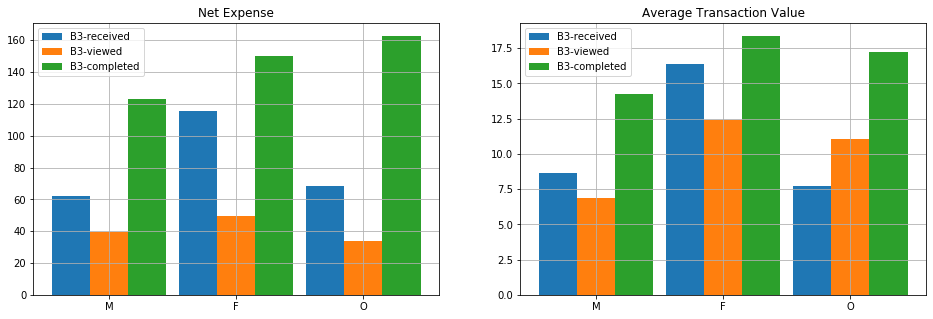

In [32]:
rcv_gender, vwd_gender, cpd_gender = get_offer_stat_by(customers_ana, 'net_expense', 'B3', 'gender', aggr='mean')
rcv_avg_gender, vwd_avg_gender, cpd_avg_gender = get_average_expense_by(customers_ana, 'B3', 'gender')

plt.figure(figsize=(16,5))

plt.subplot(121)
index = np.array([0,1,2])
bar_width = 0.3

plt.bar(index, rcv_gender.reindex(['M', 'F', 'O']), bar_width, label='B3-received')
plt.bar(index + bar_width, vwd_gender.reindex(['M', 'F', 'O']), bar_width, label='B3-viewed')
plt.bar(index + 2*bar_width, cpd_gender.reindex(['M', 'F', 'O']), bar_width, label='B3-completed')
plt.grid();
plt.legend(loc='best');
plt.title('Net Expense');
plt.xticks(index + bar_width, ('M', 'F', 'O'));

plt.subplot(122)

index = np.array([0,1,2])
bar_width = 0.3
plt.bar(index, rcv_avg_gender.reindex(['M', 'F', 'O']), bar_width, label='B3-received')
plt.bar(index + bar_width, vwd_avg_gender.reindex(['M', 'F', 'O']), bar_width, label='B3-viewed')
plt.bar(index + 2*bar_width, cpd_avg_gender.reindex(['M', 'F', 'O']), bar_width, label='B3-completed')
plt.grid();
plt.legend(loc='best');
plt.title('Average Transaction Value');
plt.xticks(index + bar_width, ('M', 'F', 'O'));

So Finally, for other gender, the recommended offer is B3. so here we can see the fina result

<h><b>Conclusions</b><h><br>
This project provided a way to implement a real recommendation system from scratch. The process was engaging since it required the implementation of all the steps of the data science methodology. It was interesting as well as difficult to decide what kind of data to use for the analysis. The project could have taken different directions if other aspects of the data were taken into account. For instance, instead of using the net expense and the average transaction value, we could have used the frequency at which offers were completed, or what was the time that customer took to completed an offer after viewing it. This was possible thanks to the timestamps provided in the datasets.